In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
from numpy.linalg import norm
import scipy.stats as stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


%matplotlib inline 

In [2]:
# параметры распределений
mu0 = np.array([-2.,1.])
mu1 = np.array([3.,-0.5])

In [3]:
def sample(d0, d1, n=32):
    x0 = d0.sample((n,))
    x1 = d1.sample((n,))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [4]:
d0 = torch.distributions.MultivariateNormal(torch.tensor(mu0.data), torch.eye(2))
d1 = torch.distributions.MultivariateNormal(torch.tensor(mu1.data), torch.eye(2))

In [5]:
d0.sample((10,))

tensor([[-1.8445,  1.1693],
        [-2.0838,  3.1221],
        [-2.1121,  2.4604],
        [-2.4387, -0.6776],
        [-2.6333, -0.0055],
        [-3.3535, -0.4838],
        [-3.7068, -0.4601],
        [-1.9203,  0.3411],
        [-1.0498,  1.6754],
        [ 0.4897,  1.0257]])

In [6]:
d1.sample((10,))

tensor([[ 1.4430, -0.2835],
        [ 3.9705, -0.8912],
        [ 2.3378, -1.6407],
        [ 2.6849, -1.0365],
        [ 4.2192, -0.8347],
        [ 3.8297, -0.3508],
        [ 3.1616, -0.1267],
        [ 4.5818, -1.0834],
        [ 2.4438, -0.7325],
        [ 3.0924,  0.5151]])

In [7]:
layer = nn.Linear(2, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([0.1664, 0.5865]), tensor(0.3895)]


In [8]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = torch.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = torch.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

Ошибка после 0 итераций: 0.793463
Ошибка после 1 итераций: 0.366860
Ошибка после 2 итераций: 0.237998
Ошибка после 3 итераций: 0.180092
Ошибка после 4 итераций: 0.146935
Ошибка после 5 итераций: 0.125027
Ошибка после 6 итераций: 0.110004
Ошибка после 7 итераций: 0.099084
Ошибка после 8 итераций: 0.089854
Ошибка после 9 итераций: 0.083518
Ошибка после 10 итераций: 0.078016
Ошибка после 11 итераций: 0.073248
Ошибка после 12 итераций: 0.069516
Ошибка после 13 итераций: 0.065899
Ошибка после 14 итераций: 0.062644
Ошибка после 15 итераций: 0.060181
Ошибка после 16 итераций: 0.057736
Ошибка после 17 итераций: 0.055797
Ошибка после 18 итераций: 0.054230
Ошибка после 19 итераций: 0.052427


In [9]:
# Берем другое"тестовое" распределение
d0 = torch.distributions.MultivariateNormal(torch.tensor([-0.5, 3]), torch.eye(2))
d1 = torch.distributions.MultivariateNormal(torch.tensor([1.5, -2]), torch.eye(2))
x, y = sample(d0, d1, 1024)

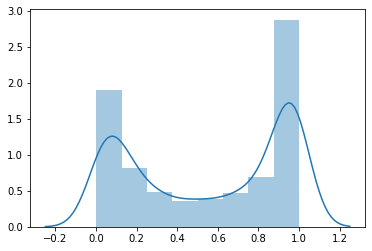

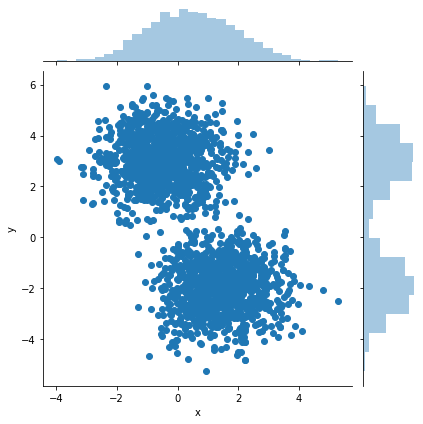

In [10]:
with torch.no_grad():
    dist = torch.sigmoid(layer(x)).numpy()
sns.distplot(dist.flatten());
df = pd.DataFrame(x.numpy(), columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df);